# Análisis Exploratorio de Datos
Laura Loaiza Palacio

### Imports librerías utilizadas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# estandarización de algunas características de las gráficas
sns.set_style(style="whitegrid")
sns.set_context(context="notebook")
plt.rcParams['figure.figsize'] = (11, 9.4)

readmitted_color = {
    '>30': '#ff6602ff',
    'NO': '#0f7175ff',
    '<30': '#c65dc9ff'
}

Con base al análisis inicial de la problemática, el cual se encuentra en la carpeta documentos, se inicia el proceso de análisis exploratorio de los datos. El fin de este análisis, es el extraer valor importante de los datos que pueda ayudar a identificar distintos mecanismos de ayuda para los pacientes con diabetes.

Se inicia con un análisis del tipo de datos y organización de los datos con los que se cuenta.

In [ ]:
diabetes_df = pd.read_csv("./data/diabetic_data.csv")
diabetes_df.head()

encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No   
1                 3  ...          No      Up                   No   
2                 2  ...          No      No                   No   
3                 2  ...          No      Up                   No   
4                 1  ...          No  Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   

   metformin-pioglitazone  change diabetesMed readmitted  
0                      No      No          No         NO  
1                      No      Ch         Yes        >30  
2                      No      No         Yes         NO  
3                      No      Ch         Yes         NO  
4                      No      Ch         Yes         NO  

[5 rows x 50 columns]

Miremos el tipo de datos de cada variable, dado que son 50 variables es interesante primero ver el conteo de los diferentes tipos de datos.

In [ ]:
diabetes_df.dtypes.value_counts()

object    37
int64     13
Name: count, dtype: int64

In [ ]:
diabetes_df.shape

(101766, 50)

#### ¿Qué tipo de variables tenemos en el conjunto de datos y cuántos registros existen?

Se cuenta en total solo con dos tipos de datos para todo el conjunto de datos, estos son tipo object y tipo int64.

Una mirada inicial nos hace ver que la mayoría de datos son de tipo categórico.

Además, se cuenta con 50 variables y 101.766 registros u observaciones.

In [ ]:
valores_nulos_variables = diabetes_df.isnull().sum()

solo_nulos_variables = valores_nulos_variables[valores_nulos_variables > 0]

solo_nulos_variables

max_glu_serum    96420
A1Cresult        84748
dtype: int64

In [ ]:
(
    valores_nulos_variables
    .sum()
)

181168

#### ¿Cuántos valores nulos hay en el conjunto de datos (dataset)?

Por otra parte, de la totalidad de variables solo dos cuentan con valores nulos, las variables con valores nulos son *max_glu_serum* con 96.420 y *A1Cresult* con 84.748, para un total de 181.168 valores nulos en todo el conjunto de datos.

Es importante analizar si la proporción de valores nulos en el dataset es importante, esto nos indicará si se pueden ignorar los registros con datos faltantes o hay algún tipo de variable en específico que tiene un gran número de valores faltantes.

#### ¿Qué proporción de valores faltantes tenemos en el dataset por cada variable?

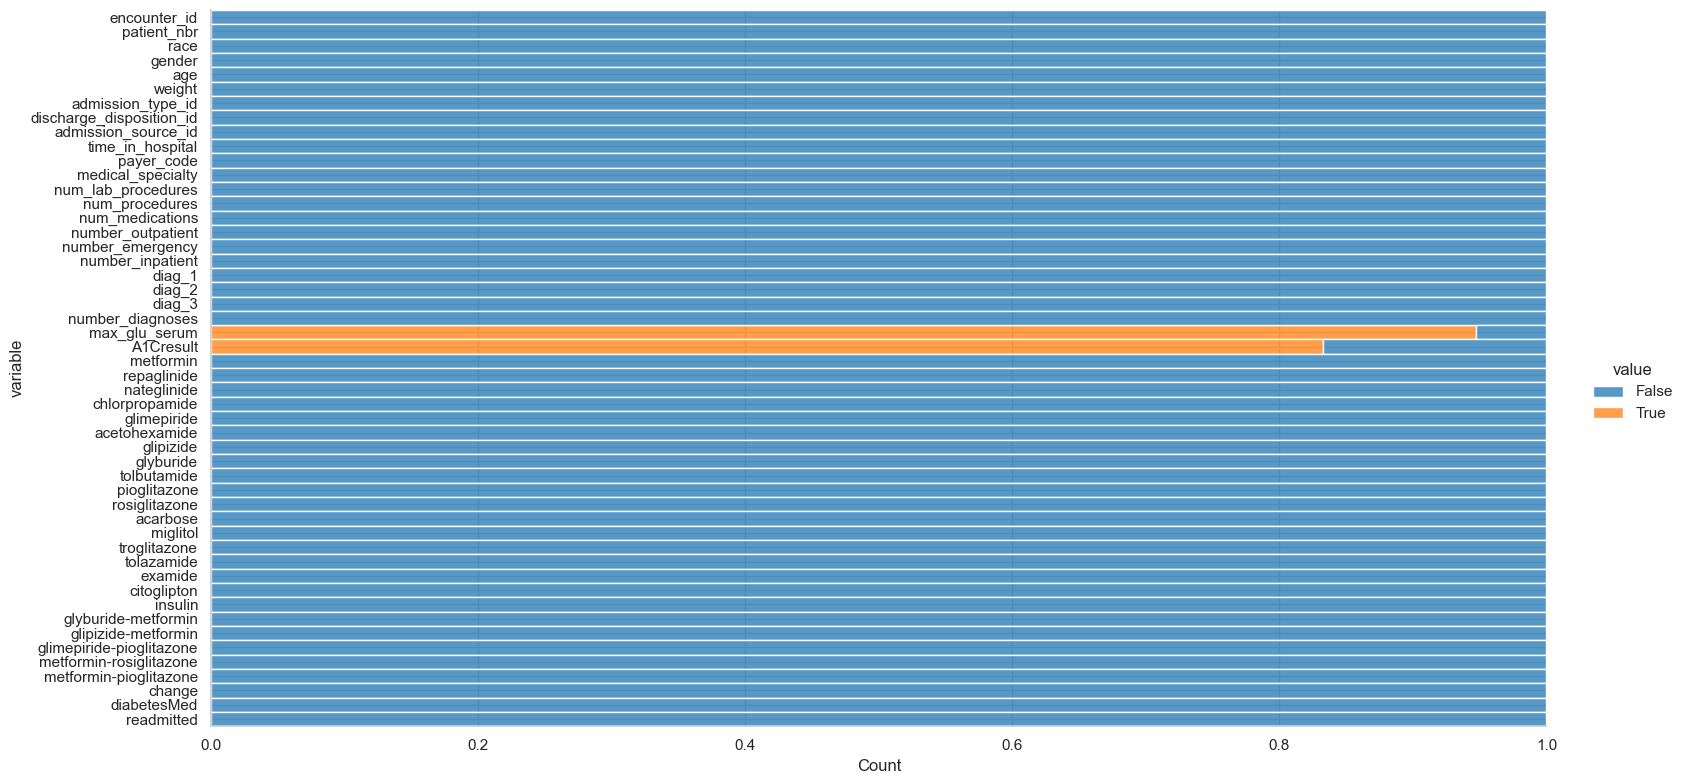

In [ ]:
# generación de gráfica de proporción
(
    diabetes_df
    .isnull()
    .melt()
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='value',
                multiple='fill',
                aspect=2,
                height=8
            )
        )
    )
)

Como observamos de la gráfica anterior, la cantidad mayoritaria de valores nulos (181.168) proviene de dos fuentes de variables o columnas y no están distribuidas entre la totalidad de variables en el dataset. Por lo anterior, es conveniente eliminar las dos columnas dado que no aportan valor al análisis del dataset y puede generar problemas en caso de implementar modelos para el análisis.

In [ ]:
columnas_mayoria_nulos = ["max_glu_serum", "A1Cresult"]
diabetes_df = diabetes_df.drop(columnas_mayoria_nulos, axis=1)
diabetes_df.shape # nueva dimensionalidad del dataset con 48 columnas

(101766, 48)

El dataset que estamos analizando tiene una gran cantidad de variables por analizar, vamos a seguir haciendo una análisis de las cualidades de este basados en la característica de cada variable, sin embargo ya desde un inicio sabemos que al ser tal la cantidad de variables es pertinente implementar un método de segmentación de datos que nos diga cómo se agrupan los distintos tipos de variables según estén relacionadas.

Ahora, en los datos tipo numérico, encontramos algunos que son realmente una encodización de variables categóricas.

Para referenciar cuáles son estos miremos el dataset IDS_mapping.csv que contiene el número entero y el tipo de categoría a la que representa el número.

In [ ]:
IDS_mapping = pd.read_csv("./data/IDS_mapping.csv")

Se debe hacer un tratamiento y separación de la información, en este archivo se encuentran los nombres correspondientes para cada valor en las columnas *admission_type_id*, *discharge_disposition_id* y *admission_source_id*.

In [ ]:
admission_type_id = IDS_mapping[:8]

discharge_disposition_id = IDS_mapping[8:39]
column_name_discharge_disposition_id = discharge_disposition_id.iloc[0]
discharge_disposition_id.columns = column_name_discharge_disposition_id
discharge_disposition_id = discharge_disposition_id[1:]

admission_source_id = IDS_mapping[40:]
admission_source_id = admission_source_id.rename(columns={"admission_type_id": "admission_source_id"})

In [ ]:
for i in range(18, 21):

    valor_cambiar = discharge_disposition_id["discharge_disposition_id"].iloc[i].split(",")
    discharge_disposition_id["discharge_disposition_id"].iloc[i] = valor_cambiar[0]
    discharge_disposition_id["description"].iloc[i] = valor_cambiar[1]

In [ ]:
admission_type_id["admission_type_id"] = admission_type_id["admission_type_id"].astype(int)
discharge_disposition_id["discharge_disposition_id"] = discharge_disposition_id["discharge_disposition_id"].astype(int)
admission_source_id["admission_source_id"] = admission_source_id["admission_source_id"].astype(int)

C:\Users\diego\AppData\Local\Temp\ipykernel_12320\928071518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  admission_type_id["admission_type_id"] = admission_type_id["admission_type_id"].astype(int)


In [ ]:
admission_type_id

admission_type_id    description
0                  1      Emergency
1                  2         Urgent
2                  3       Elective
3                  4        Newborn
4                  5  Not Available
5                  6            NaN
6                  7  Trauma Center
7                  8     Not Mapped

In [ ]:
discharge_disposition_id

8   discharge_disposition_id  \
9                          1   
10                         2   
11                         3   
12                         4   
13                         5   
14                         6   
15                         7   
16                         8   
17                         9   
18                        10   
19                        11   
20                        12   
21                        13   
22                        14   
23                        15   
24                        16   
25                        17   
26                        18   
27                        19   
28                        20   
29                        21   
30                        22   
31                        23   
32                        24   
33                        25   
34                        26   
35                        30   
36                        27   
37                        28   
38                        29   

8                                         description  
9                                  Discharged to home  
10  Discharged/transferred to another short term h...  
11                      Discharged/transferred to SNF  
12                      Discharged/transferred to ICF  
13  Discharged/transferred to another type of inpa...  
14  Discharged/transferred to home with home healt...  
15                                           Left AMA  
16  Discharged/transferred to home under care of H...  
17          Admitted as an inpatient to this hospital  
18  Neonate discharged to another hospital for neo...  
19                                            Expired  
20  Still patient or expected to return for outpat...  
21                                     Hospice / home  
22                         Hospice / medical facility  
23  Discharged/transferred within this institution...  
24  Discharged/transferred/referred another instit...  
25  Discharged/transferred/referred to this instit...  
26                                                NaN  
27                    "Expired at home. Medicaid only  
28      "Expired in a medical facility. Medicaid only  
29                                           "Expired  
30  Discharged/transferred to another rehab fac in...  
31  Discharged/transferred to a long term care hos...  
32  Discharged/transferred to a nursing facility c...  
33                                         Not Mapped  
34                                    Unknown/Invalid  
35  Discharged/transferred to another Type of Heal...  
36  Discharged/transferred to a federal health car...  
37  Discharged/transferred/referred to a psychiatr...  
38  Discharged/transferred to a Critical Access Ho...

In [ ]:
admission_source_id

admission_source_id                                        description
40                    1                                 Physician Referral
41                    2                                    Clinic Referral
42                    3                                       HMO Referral
43                    4                           Transfer from a hospital
44                    5     Transfer from a Skilled Nursing Facility (SNF)
45                    6         Transfer from another health care facility
46                    7                                     Emergency Room
47                    8                              Court/Law Enforcement
48                    9                                      Not Available
49                   10              Transfer from critial access hospital
50                   11                                    Normal Delivery
51                   12                                 Premature Delivery
52                   13                                          Sick Baby
53                   14                                   Extramural Birth
54                   15                                      Not Available
55                   17                                                NaN
56                   18           Transfer From Another Home Health Agency
57                   19             Readmission to Same Home Health Agency
58                   20                                         Not Mapped
59                   21                                    Unknown/Invalid
60                   22   Transfer from hospital inpt/same fac reslt in...
61                   23                          Born inside this hospital
62                   24                         Born outside this hospital
63                   25            Transfer from Ambulatory Surgery Center
64                   26                              Transfer from Hospice

Ahora que conocemos la encodización de estas variables, hagamos un análisis de frecuencia de los distintos datos.
Miremos algunas de las variables que según su descripción de metadata sea interesante o combinaciones de estas.

<Axes: xlabel='race'>

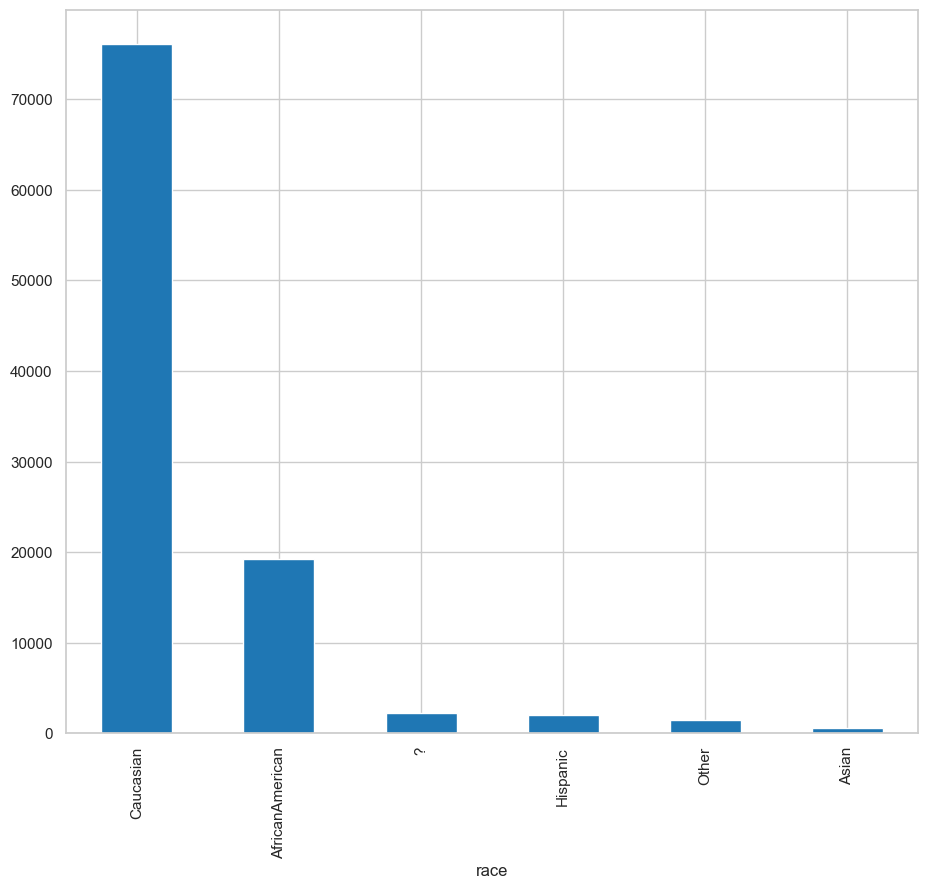

In [ ]:
(
    diabetes_df
    .race
    .value_counts()
    .plot(
        kind='bar'
    )
)

Analizando la frecuencia de la variable raza encontramos varias cosas, primero vemos que en gran proporción la mayoría de los pacientes son de raza caucasicos, seguido por Americanos Africanos.

Por otra parte, vemos un tipo de dato erroneo en la variable que ya habíamos visto en el primer print del dataset general y es el caracter '?', hagamos un análisis para ver si se encuentra en más columnas.

In [ ]:
variables_caracter = dict()
for col in diabetes_df.columns:
    if diabetes_df[col].dtype == object:
         variables_caracter[col]=diabetes_df[col][diabetes_df[col] == '?'].count()

In [ ]:
dif_ceros_variable_catacter = {clave: valor for clave, valor in variables_caracter.items() if valor !=0}
dif_ceros_variable_catacter

{'race': 2273,
 'weight': 98569,
 'payer_code': 40256,
 'medical_specialty': 49949,
 'diag_1': 21,
 'diag_2': 358,
 'diag_3': 1423}

Es decir que el caracter '?' se encuentra en gran parte de los datos, siendo la totalidad de registros del orden de 100 mil, la variable *weight* en casi su totalidad tiene este caracter, mientras que *payer_code* y *medical_specialty* se acercan a la mitad. Por lo anterior ambas variables serán descartadas por la incompletitud de sus datos ya que pueden afectar a la hora de agrupar o crear un modelo para relacionarlas.
Antes de borrar estas variables miremos que nos pueden decir por ejemplo *payer_code* que contienen un 50% de información recolectada.

<Axes: xlabel='payer_code'>

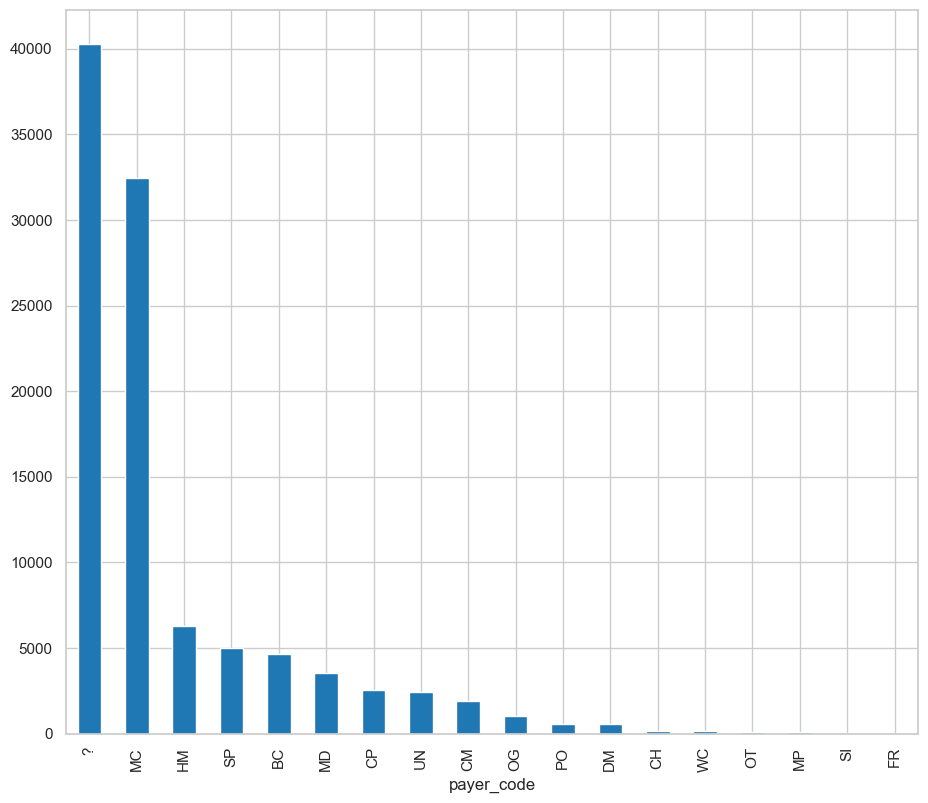

In [ ]:
(
    diabetes_df
    .payer_code
    .value_counts()
    .plot(
        kind='bar'
    )
)

En una primera instancia, podemos ver que en la mayoría de datos recolectados los pacientes atendidos provienen del programa MC (Medicare), este programa se caracteriza por ser del gobierno federal y es para personas mayores a 65 años y algunas personas con discapacidad. Entonces, la mayoría de pacientes que entran por complicaciones relacionadas con diabetes ¿son adultos mayores a 65 años?, ¿gran parte de los pacientes son personas con alguna discapacidad y por ende tienen más complicaciones médicas?.
En este mismo orden, podría decirse que para prevenir este tipo de enfermedad se debe concientizar a las personas desde edades más jóvenes para que con un estilo de vida adecuado no la padescan, de igual forma la detección a tiempo puede evitar el ingreso a hospitales en edades posteriores dado que no es una enfermedad que atiendan de forma común jóvenes, esto se deduce porque las personas que son más atendidas son las del plan de pago MC que superan los 65 años.

In [ ]:
columnas_mayoria_caracter = ["weight", "payer_code", "medical_specialty"]
diabetes_df = diabetes_df.drop(columnas_mayoria_caracter, axis=1)
diabetes_df.shape # nueva dimensionalidad del dataset con 45 columnas

(101766, 45)

Con respecto a las demás columnas con el caracter incógnito '?' dado que no tienen una cantidad relevante de este caracter se opta por eliminar solo los registros que lo contengan. Esto no supone una mayor afectación, en caso de que lo fuera con el objetivo de crear un modelo supervisado de ML, se optaría por algún tipo de estrategia para reemplazarlos.

In [ ]:
diabetes_df.replace('?', pd.NA, inplace=True)
diabetes_df.dropna(inplace=True)
diabetes_df.shape

(98053, 45)

Vemos que los registros han pasado de 101.766 a 98.053, lo cual no es una relevante afectación.
Entonces continuemos con el análisis de frecuencias de los datos.

In [ ]:
diabetes_df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

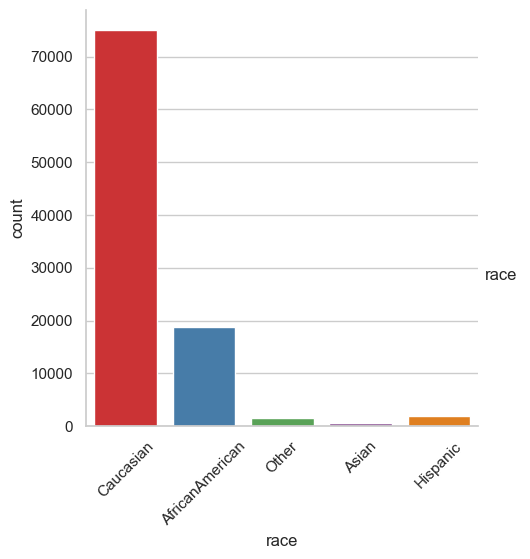

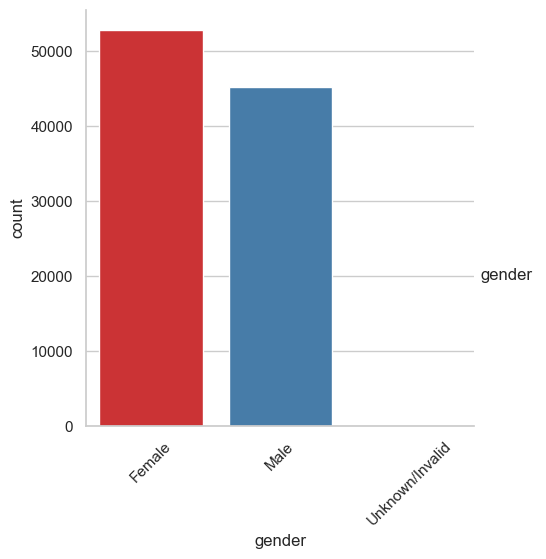

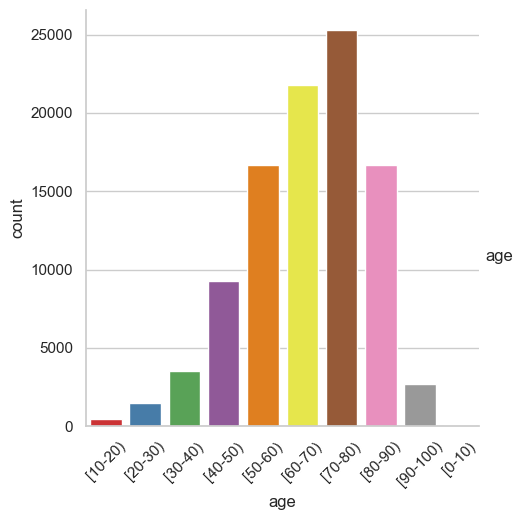

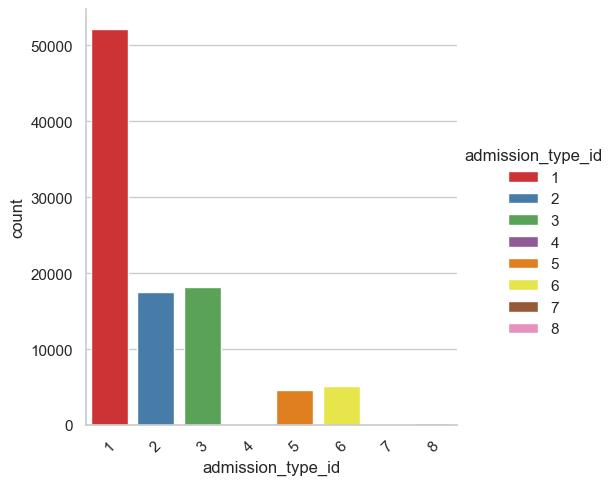

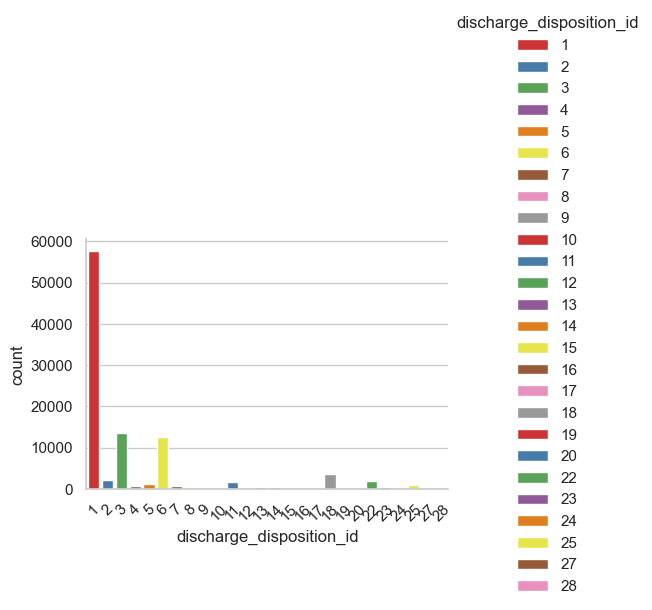

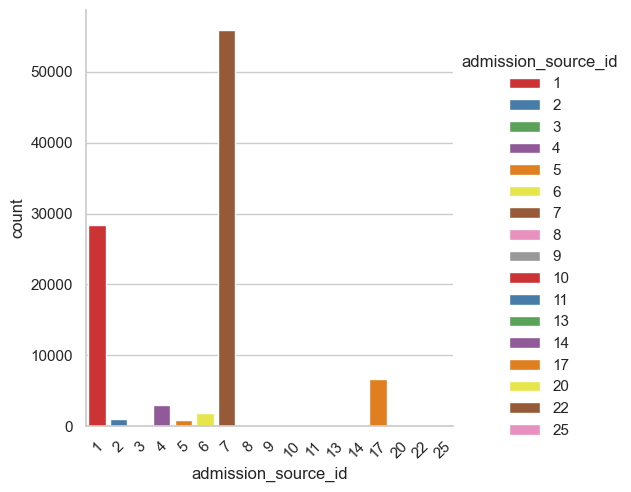

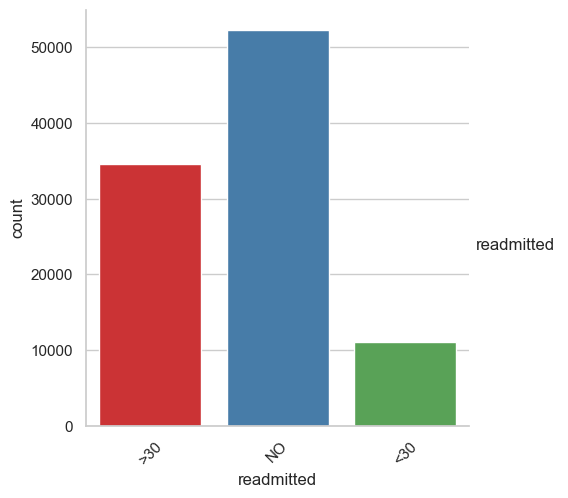

In [ ]:
columnas_frecuencia = ['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'readmitted']
for col in columnas_frecuencia:
    variable = col
    sns.catplot(
        data=diabetes_df,
        x=variable,
        kind='count',
        palette='Set1',
        hue=variable
    )

    plt.xticks(rotation=45)
    plt.show()

Recordemos de nuevo que el análisis específico de estas variables se debe a la descripción de su metadata, lo cual genera mayor o menor interés para este tipo de gráficos.

Ahora bien, hay varias cosas para resaltar, entre ellas que varias de las gráficas tienen como categoría un número entero, este tiene su correspondencia en las tablas que tratamos antes de hacer el análisis de frecuencia.

1. Sobre la tabla de raza, ya mencionamos que la mayoría de pacientes son caucásicos y en segundo lugar denominados africanos americanos. Esta desproporción, podría suponerse por factores como la diferencia de proporción propia de estas razas vivientes en US, de igual forma no se puede descartar que las personas caucásicas sean más propensas a este tipo de enfermedad.
2. En la variable género, se conserva cierta proporción entre el género masculino y femenino, es decir que ambos por igual padecen esta diabetes en los centros médicos donde se tomaron los datos. Por un pequeño margen los hombres son los que más han sido atendidos con esta enfermedad, por otra parte se observa la existencia de datos con el valor 'Unknown/Invalid', debemos observar si tiene relevancia o no en nuestros datos y eliminarlos dado que son ambigüos.
3. La variable edad, nos dice que las personas atendidas por diabetes están entre los 40 y 90 años, es decir que es una enfermedad que empieza a generar complicaciones a edad adulta.Las personas principalmente atendidas están entre los 60 y los 80, pero no se descarta el ingreso de personas jóvenes entre los 20 y 30 años de edad.
4. La admission_type_id o tipo de admisión, nos dice que en el siguiente orden 1 (Emergency), 3 (Elective) y 2 (Urgent) son los principales tipos de admisiones por diabetes, es decir que la principal causa de ingresos se debe a emergencias que pueden ser causadas por situaciones adversas que pueden sufrir personas con diabetes. De segundo lugar por elección, es decir para hacerle seguimiento posiblemente por consulta y finalmente son urgencias, es decir que son problemas relacionados con la diabetes que se complican.
5. Con respecto a discharge_disposition_id o disposición del paciente, en el siguiente orden 1 (Alta a domicilio), 3 (Alta/transferida al SNF) y 6 (Alta/trasladada a casa con atención médica domiciliaria) son los principales estados de los pacientes en el dataset. Es decir que, en su mayoría los pacientes han podido ser dados de alta y regresar a su domicilio, osea que el hospital pudo solucionar su situación. Incluso, los siguientes datos principales que son alta/transferido al SNF y Alta/traslado casa con atencion médica, indican que de una u otra forma los pacientes reciben una atención que logra controlar su estado de salúd ya sea con atención de enfermeras.
6. Luego admission_source_id o causa de admisión, se tiene como principales 7 (Emergency Room), 1 (Physician Referral) y 17 (NaN), siendo 7 Cuarto de emergencia el preponderante, quiere decir que los pacientes principalmente vienen del cuarto de emergencias, algo que ya veíamos desde la variable tipo de admisión. Por otra parte, los pacientes son recibidos por Referencia Médica después de analizar su condición y finalmente tenemos una cantidad de datos sin llenar siendo estos NaN.
7. Finalmente, vemos que en la variable readmisión la categoría de no-readmisión es la que gana, seguido de una readmisión pero posterior a los 30 días y en menor proporción una readmisión menor a los 30 días de salida. Esto implica que los hospitales implementan lo necesario para que la mayoría de pacientes no tengan que regresar de emergencia o por lo menos no en menos de 30 días.

### Entonces ¿Cuál es la proporción de pacientes con reintegro dentro de los 30 días posteriores a salir del hospital y tiempo posterior a los 30 días?

La respuesta se puede visualizar de la siguiente forma:

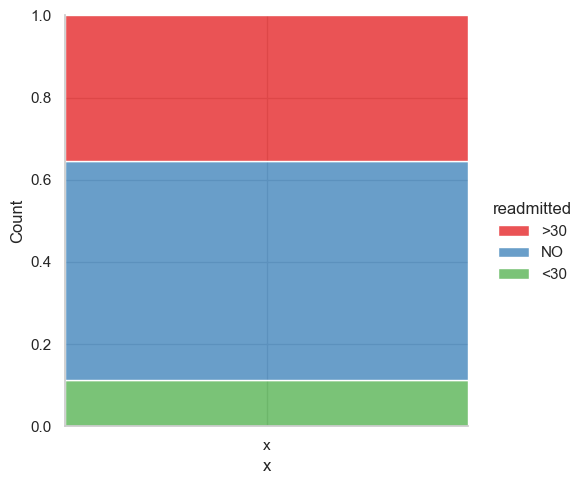

In [ ]:
# proporcionalidad de clases
(
    diabetes_df
    .assign(x='x')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='x',
                hue='readmitted',
                multiple='fill',
                palette='Set1'
            )
        )
    )
)

Es decir, que en efecto la mayoría de pacientes no tienen que retornar al hospital, pero hay una proporción importante de pacientes que retornan aunque no lo sea dentro de los 30 días posteriores a su salida.

Ahora, miremos otro tipo de variables que nos pueden decir algo más, es el caso de las siguientes tres variables:
1. *number_emergency*: variable número de visitas de emergencia de los pacientes en el año anterior a su atención.
2. *number_outpatient*: número de visitas ambulatorias (es decir con salida a casa) del paciente en el año anterior a su atención.
3. *number_inpatient*: número de visitas hospitalarias del paciente en el año anterior a su atención.

Este tipo de variables son numéricas discretas, por lo tanto es interesante hacer un análisis de sus medidas de tendencia y sus distribuciones.

Primero veamos un panorama general de comparación de estas variables con respecto a la variable *readmitted* sobre el reingreso o no de los pacientes.

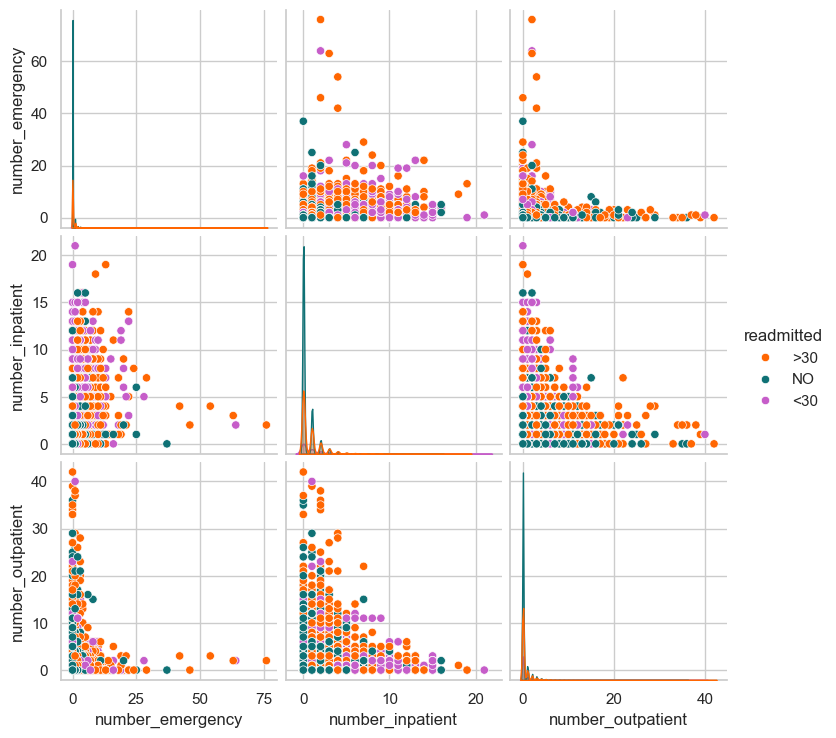

In [ ]:
sns.pairplot(
    data=diabetes_df[['number_emergency', 'number_inpatient', 'number_outpatient', 'readmitted']],
    hue='readmitted',
    palette=readmitted_color
)

En una primera vista no se observa un patrón que correlacione el reingreso con las variables numericas consideradas.

Implementemos este mismo esquema pero con *num_medications*, *num_procedures*, *num_lab_procedures* y *time_in_hospital*

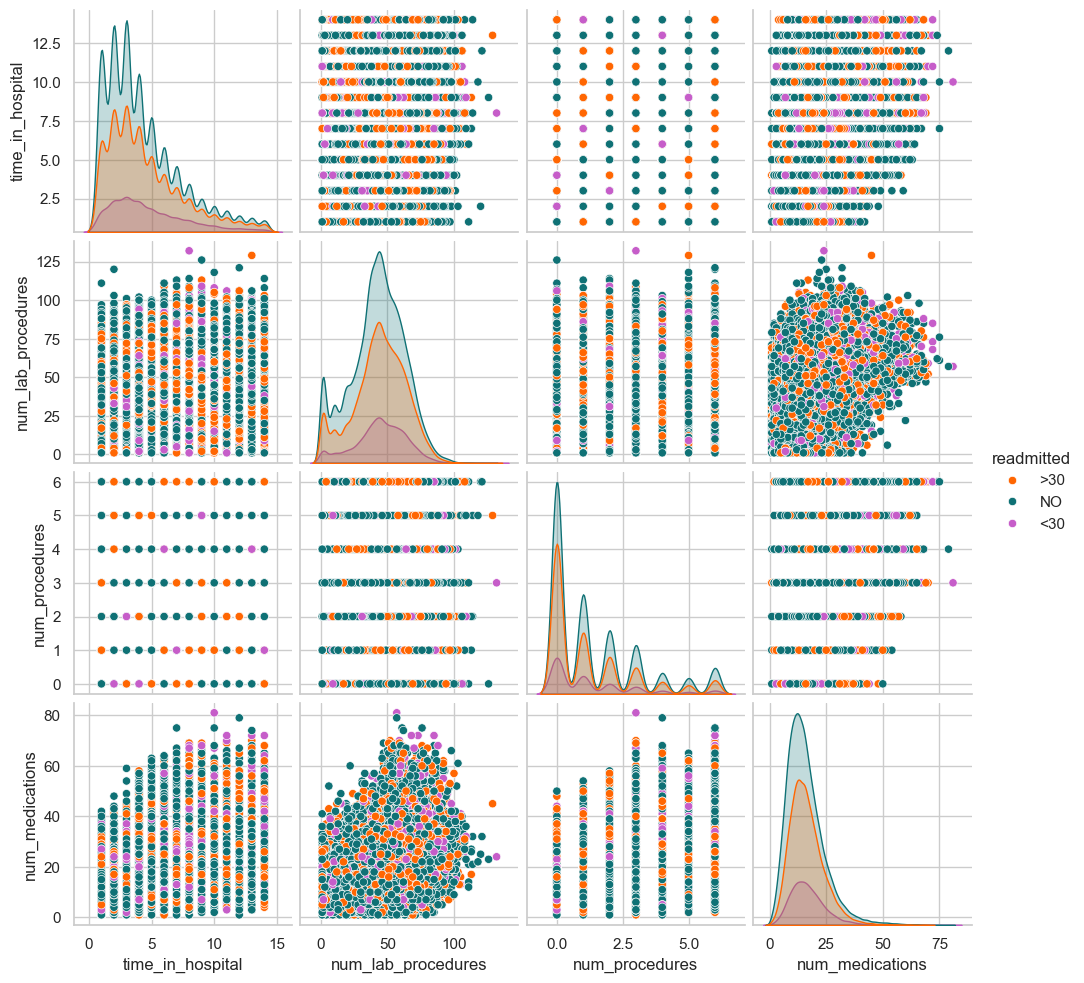

In [ ]:
sns.pairplot(
    data=diabetes_df[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'readmitted']],
    hue='readmitted',
    palette=readmitted_color
)

Esta vez podemos ver una tendencia y comportamientos que podemos analizar más a profundidad, por ejemplo la relación entre número de medicamentos y número de procedimientos de laboratorio presenta un tipo de correlación, a mayor número de procedimientos de laboratorio mayor será el número de medicamentos que el paciente obtendrá.

Por otra parte, podemos notar en la primer distribución de probabilidad que a mayor tiempo de un paciente en el hospital mayor será la probabilidad de que este no regrese o sea readmitido, para valores entre los 12.5 días. De igual forma, para tiempos considerables en el orden de 7.5 días, el paciente tiene mayor probabilidad de ser readmitido por lo menos después de 30 días de su alta.

Las variables de número de procedimientos de laboratorio y número de medicamentos suministrados, también nos dicen que a mayor cantidad de estos mayor es la probabilidad de que el paciente no regrese, esto nos dice mucho del sistema de atención en donde una buena atención y asignación de medicamentos ayuda a descongestionar los hospitales de personas por problemas causados con la diabetes.

Ahora, analicemos más de cerca las variables número de procedimientos de laboratorio y numbero de medicamentos.

<Axes: xlabel='num_lab_procedures', ylabel='num_medications'>

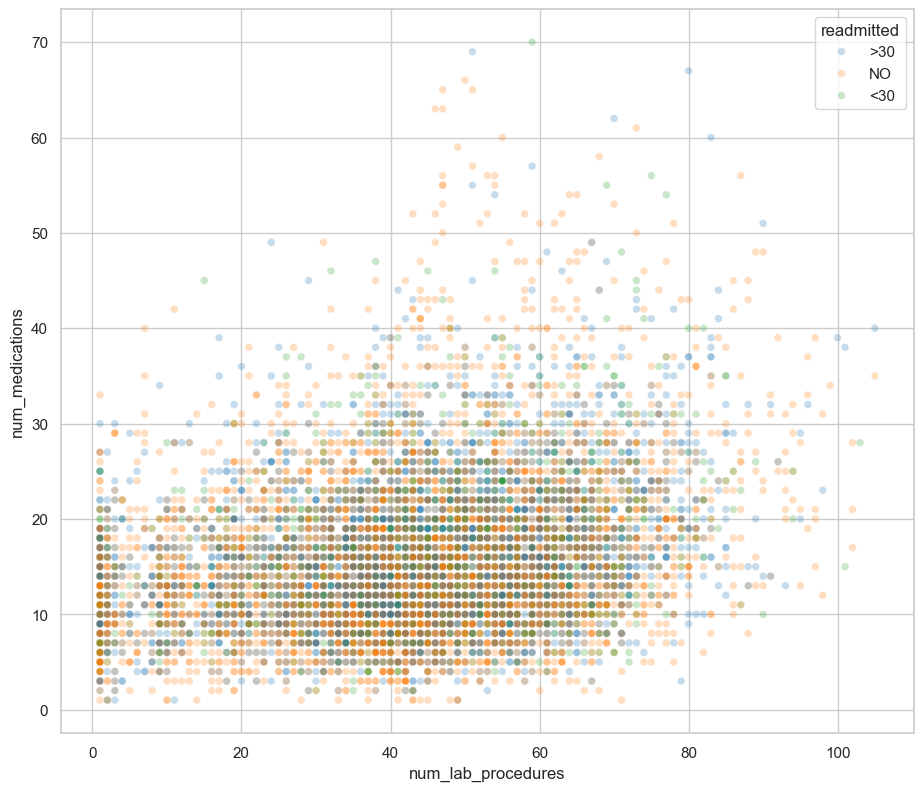

In [ ]:
sns.scatterplot(
    data=diabetes_df.sample(frac=0.1),
    x='num_lab_procedures',
    y='num_medications',
    # y='num_lab_procedures',
    # x='num_medications',
    alpha=1/4,
    hue='readmitted',
    s=30 # tamaño de los puntos, mientras menos puntos, más conviene aumentar el tamaño
)

Vemos que las dos variables tratan de tener una tendencia, pero realmente no definen una figura de tendencia fuerte, miremos de forma general las variables de tipo numéricas si poseen una correlación lineal alguna.

<Axes: >

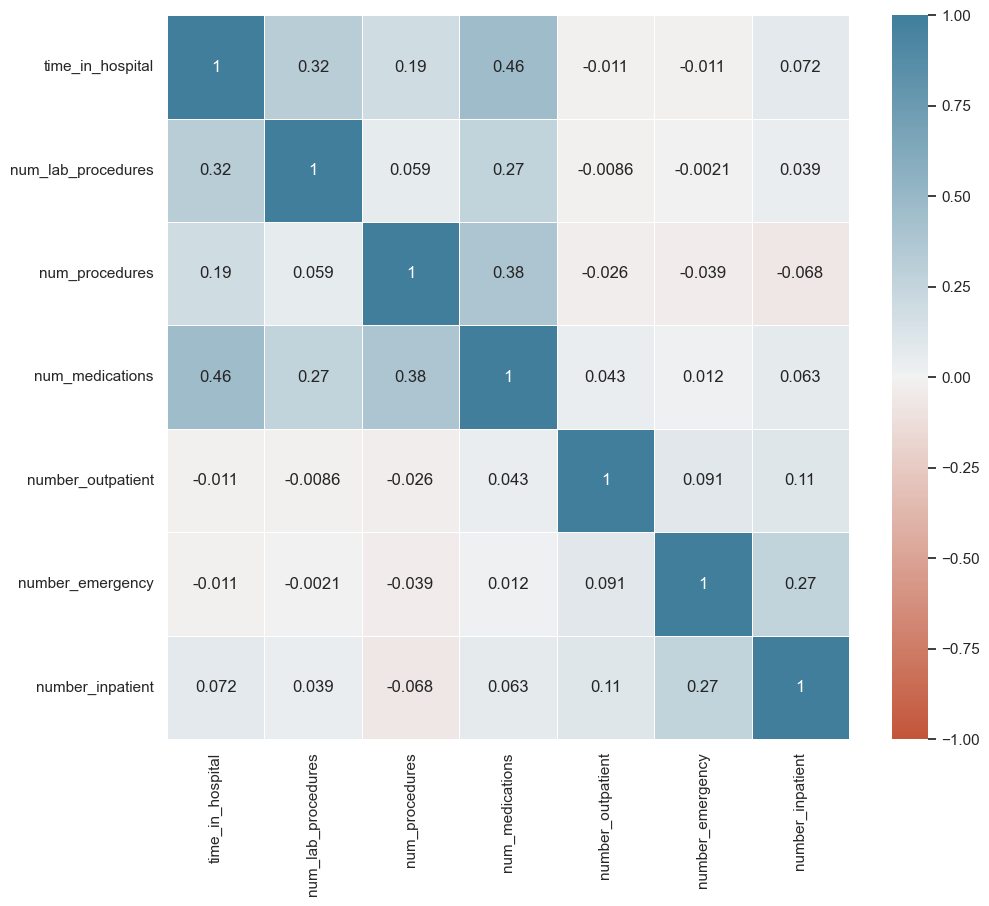

In [ ]:
no_numerica = ["encounter_id", "patient_nbr", 'race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'readmitted', 'number_diagnoses']
sns.heatmap(
    data=diabetes_df.drop(no_numerica, axis=1).corr(numeric_only=True),
    cmap=sns.diverging_palette(20, 230, as_cmap=True), # util para parámetros divergentes como -1 0 1
    center=0,
    vmin=-1, # basándonos en el coeficiente de Pearson que va de -1 a 1
    vmax=1,
    linewidths=0.5,
    annot=True # dibuja los números de cada correlación
)

Observamos que las variables con mayor correlación lineal positiva son las ya mencionadas número de procedimientos de laboratorio y número de medicamentos, aunque su nivel de correlación es bajo. También encontramos una correlación notable con el tiempo en el hospital y el número de medicamentos, es decir que a medida que pasa tiempo en el hospital un paciente, este puede recibir una mayor cantidad de medicamentos lo cual es algo esperado. Otras variables que se pueden observar son numero de procedimientos médicos con tiempo en el hospital, a mayor tiempo puede que exista una leve tendencia a aumentar los procedimientos médicos que a solo permanecer en observación.

Para seguir con las preguntas planteadas al inicio, hagamos un análisis más de proporciones, para esto creemos una nueva columna llamada numeric_readmitted la cual tiene el valor de 0 si el paciente no tuvo que ser readmitido y 1 si el paciente fue readmitido dentro o fuera de los 30 días.

In [ ]:
diabetes_df = (
    diabetes_df
    .assign(
        numeric_readmitted = lambda df: df.readmitted.replace(['NO', '>30', '<30'], [0, 1, 1])
    )
)

Veamos la proporción entre pacientes que son readmitidos 1 y pacientes que no son readmitidos 0

In [ ]:
# Calcular el porcentaje de 1s y 0s
porcentaje_1 = diabetes_df['numeric_readmitted'].value_counts(normalize=True).get(1, 0) * 100
porcentaje_0 = diabetes_df['numeric_readmitted'].value_counts(normalize=True).get(0, 0) * 100

print(f'Porcentaje de 1s: {porcentaje_1:.2f}%')
print(f'Porcentaje de 0s: {porcentaje_0:.2f}%')

Porcentaje de 1s: 46.62%
Porcentaje de 0s: 53.38%


Miremos si existe alguna relación entre el cambio o no de medicamentos y la readmisión o no de un paciente.

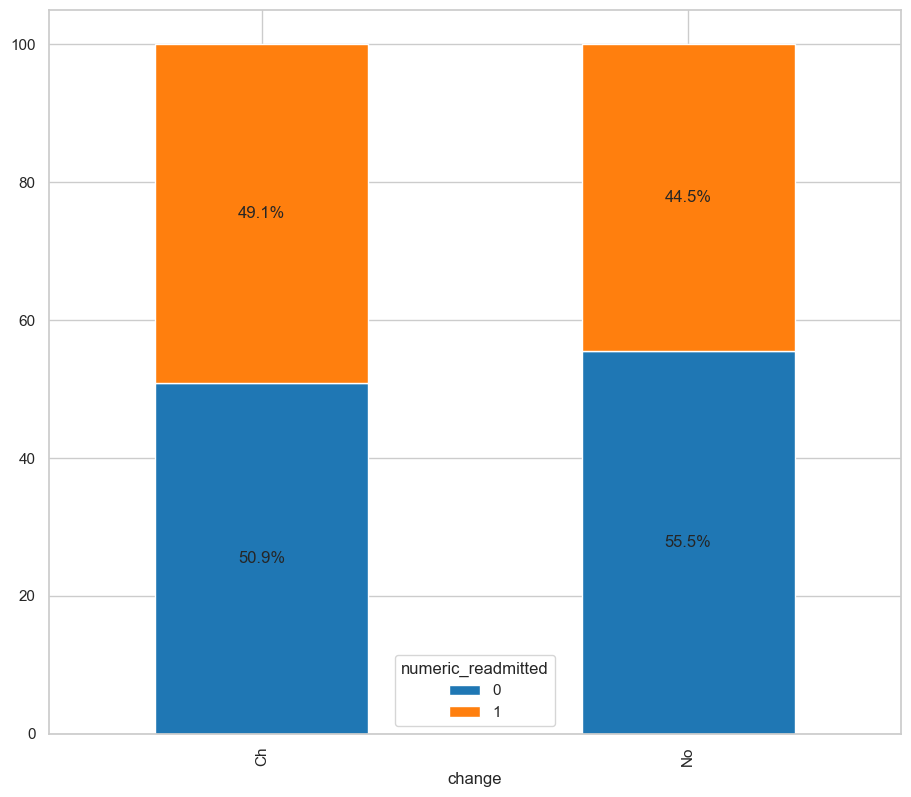

In [ ]:
resumen = pd.crosstab(diabetes_df.change, diabetes_df.numeric_readmitted, normalize='index')*100

ax = resumen.plot(kind='bar', stacked=True)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.show()

Al parecer, los pacientes que tienen un cambio en el medicamento suelen tener menos reintegros al hospital que los que no tienen un cambio en sus medicamentos. Podemos entender esto como la necesidad de hacer un mejor seguimiento a la medicina de los pacientes y optar por prestar más atención en el cambio de la medicación dado que tiene una tendencia a mejorar la no readmisión de los pacientes.

Miremos qué pasa con la variable diabetesMed que nos dice si a los pacientes se les recetó algún medicamento para la diabetes.

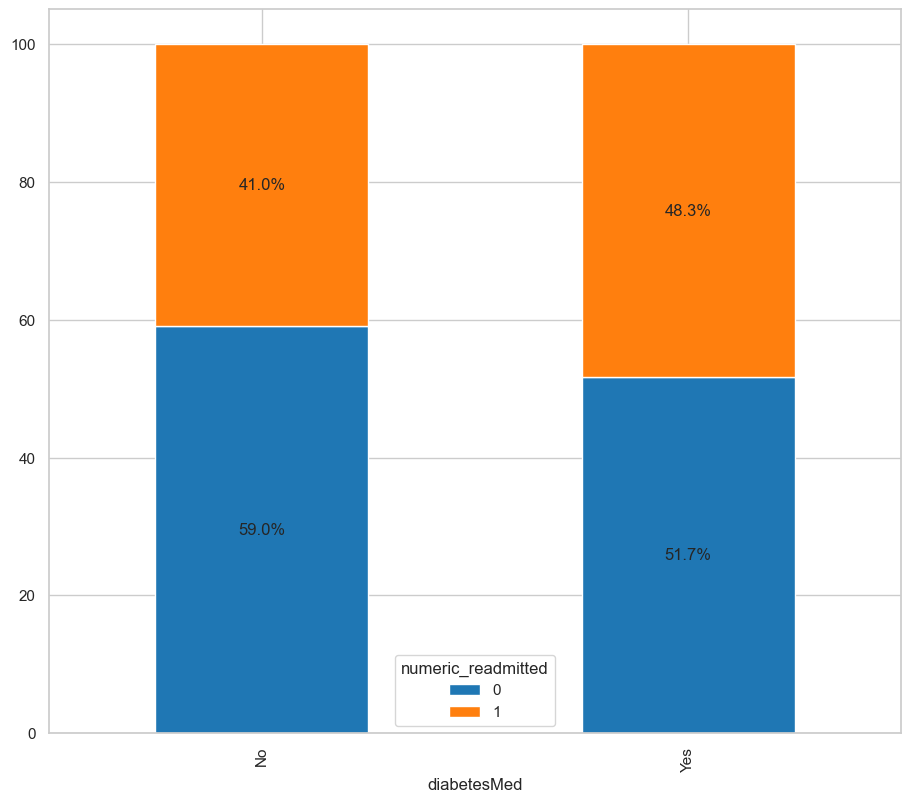

In [ ]:
resumen = pd.crosstab(diabetes_df.diabetesMed, diabetes_df.numeric_readmitted, normalize='index')*100

ax = resumen.plot(kind='bar', stacked=True)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.show()

La anterior proporción, es interesante porque nos dice que si el paciente que ingresó NO ha tenido medicaciones previas para la diabetes, es menos probable que tenga una readmisión. Podría entenderse como una atención correcta sobre el problema con el que llegó.

Finalmente, podemos ver cómo es el comportamiento de los valores atípicos en algunas variables numéricas de interes. Usemos como categoría el rango de edades ya que es una de las variables con más variedad de frecuencias.

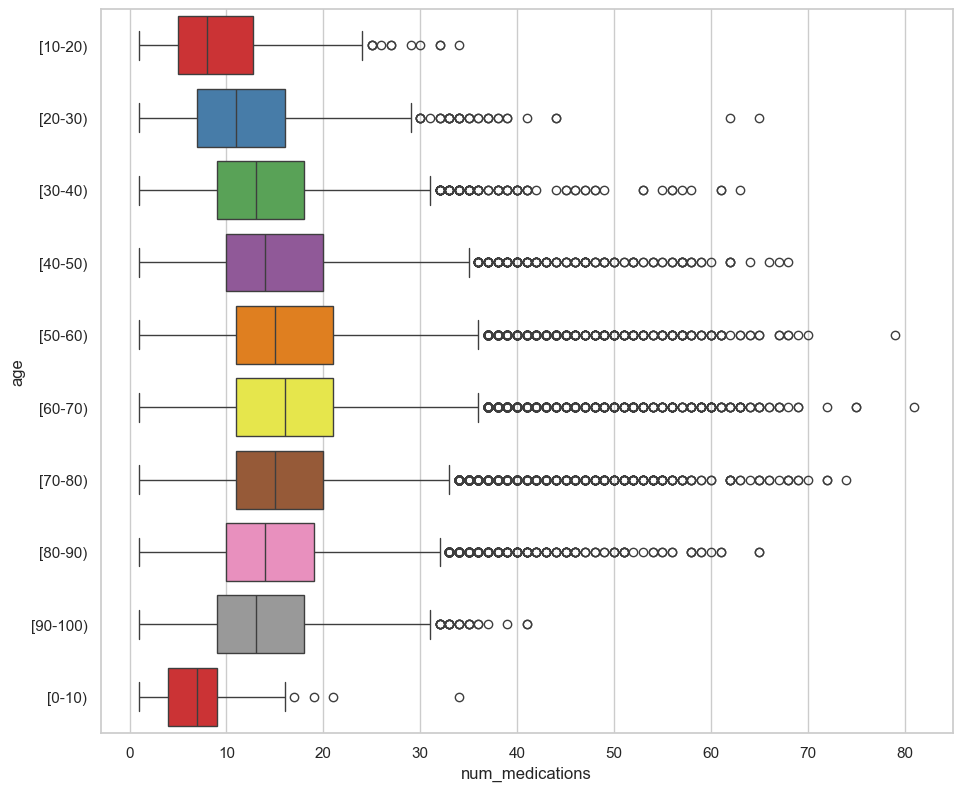

In [ ]:
ax = sns.boxplot(
    data=diabetes_df,
    x='num_medications',
    y='age',
    palette='Set1',
    hue='age'
)

Se observa que hay una cantidad considerable de valores atípicos, en caso de un entrenamiento estos deben ser tratados para no desmejorar el rendimiento de este. Se puede ver que los pacientes con edades adultas tienen una mayor cantidad de medicamentos que edades menores.

Esta comparación se tiene en cuenta porque muestra que el número de medicamentos tiene un comportamiento diferente para cada edad, con lo cual es una buena variable para utilizar en entrenamiento de modelos que nos ayuden a hacer algún tipo de predicciones sobre el tema.

Otra variable para analizar es el tiempo que pasan las personas en el hospital comparado con su edad.

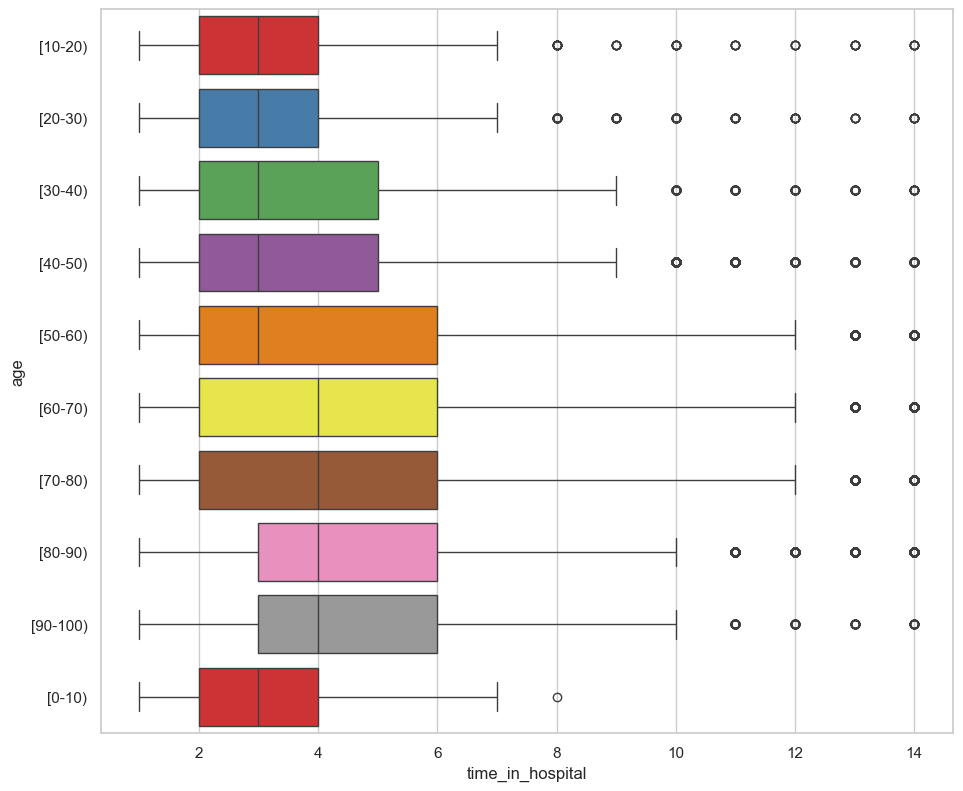

In [ ]:
ax = sns.boxplot(
    data=diabetes_df,
    x='time_in_hospital',
    y='age',
    palette='Set1',
    hue='age'
)

Se observa que a mayor edad mayor es el tiempo que se pasa en el hospital, mientras que edades más jóvenes entre 0 y 30 años se mantiene una tendencia similar de tiempo en el hospital y esta es baja.

Como ya se vió, no hay muchas variables que presenten una correlación lineal o algún tipo de tendencia, se exploro con diferentes combinaciones de clases y variables sin observar comportamientos importantes. Para seguir explorando aun más los datos creemos otra nueva columna, esta columna nos dirá la gravedad del paciente y se medirá como la suma de tiempo y actividades realizadas como exámenes médicos y medicamentos recibidos entre otros procedimientos.

In [ ]:
diabetes_df["level_diabetes"] = (
    diabetes_df["number_inpatient"]
    + diabetes_df["number_emergency"]
    + diabetes_df["num_medications"]
    + diabetes_df["num_procedures"]
    + diabetes_df["num_lab_procedures"]
    + diabetes_df["time_in_hospital"]
    )

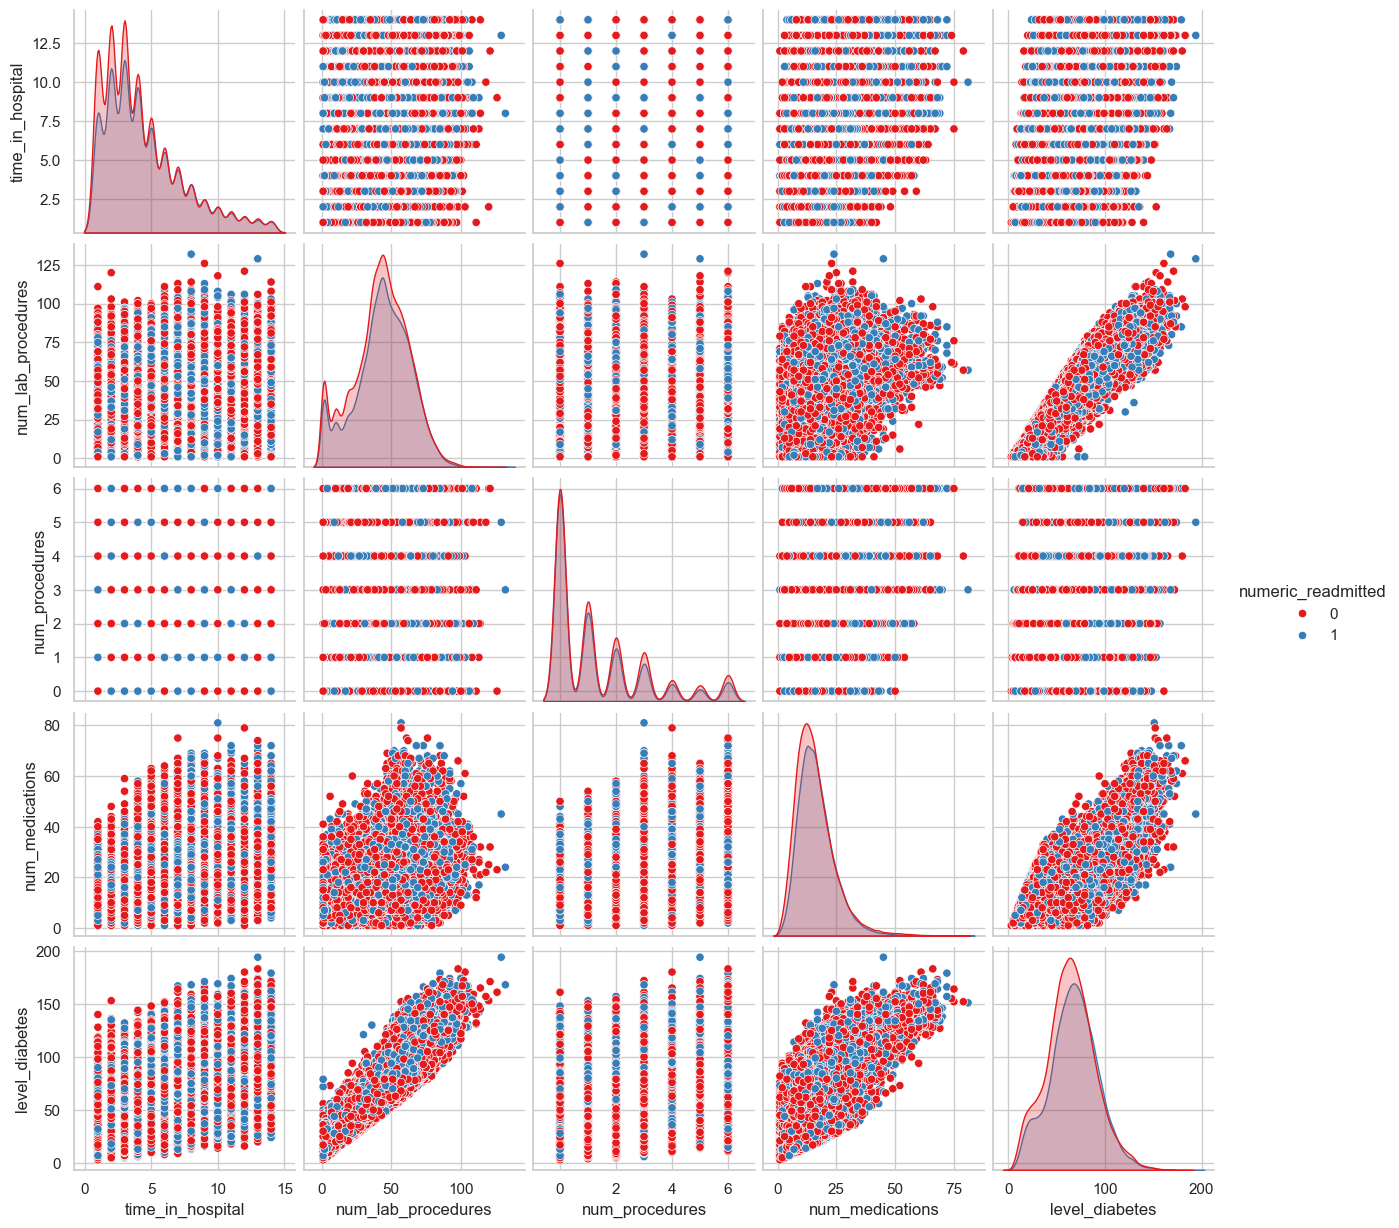

In [ ]:
sns.pairplot(
    data=diabetes_df[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'numeric_readmitted', 'level_diabetes']],
    hue='numeric_readmitted',
    palette='Set1'
)

Observamos que se muestra una tendencia más marcada entre el número de procedimientos de laboratorio y el nivel de la diabetes, mientras más exámenes de laboratorio tenga el paciente mayor será su nivel de gravedad. Entonces se debe prestar atención a qué tipo de exámenes de laboratorio se estan aplicando sobre los pacientes más graves, podría existir el caso de que la diabetes complica al paciente en otra serie de enfermedades y por este motivo se aplica una serie de exámenes diferentes. Con esto, también entra en juego una buena pedagogía hacia el paciente para tener cuidados no sólo con los alimentos o actividades directamente relacionadas con la diabetes, si no que también con otras patologías relacionadas.

Cabe resaltar que correlación no implica necesariamente causalidad y que muchas de las conclusiones deben ser tenidas en cuenta a criterio de un experto médico.

También, se hicieron diferentes pruebas de dispersiones y visualizaciones con todos los tipos de clases, esto debido a que se puede incurrir en la paradoja de Simpson, en donde se pueden concluir dos cosas totalmente opuestas a partir de los mismos datos dependiendo de cómo se clasifican estos. Los resultados aquí presentados fueron los que mostraron un mejor patrón en general.

El informe resumido de este análisis exploratorio de datos se lleva acabo en la documentación, en el archivo de presentación ppt llamado Entrega de resultados.

# Apéndice de gráficas informe final

<Figure size 1200x600 with 0 Axes>

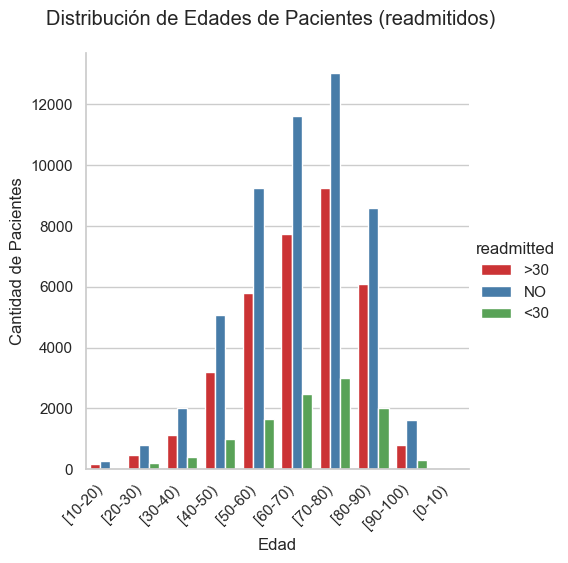

In [ ]:
# Agrega la palabra "readmitido" al título
titulo = 'Distribución de Edades de Pacientes (readmitidos)'

# Agrega "Cantidad de Pacientes" al eje y
plt.figure(figsize=(12, 6))
sns.set(style='whitegrid')  # Puedes cambiar el estilo según tu preferencia

# Personaliza el gráfico
plot = sns.catplot(
    data=diabetes_df,
    x='age',
    kind='count',
    palette='Set1',
    hue='readmitted'
)

# Añade títulos y etiquetas
plot.fig.suptitle(titulo, y=1.05)  # Coloca el título encima del gráfico
plt.xlabel('Edad')
plt.ylabel('Cantidad de Pacientes')

# Ajusta el formato de las etiquetas en el eje x
plt.xticks(rotation=45, ha='right')

plt.savefig('./documentos/imagenes/distribucion_edades_pacientes.png', dpi=300, bbox_inches='tight')

# Muestra el gráfico
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


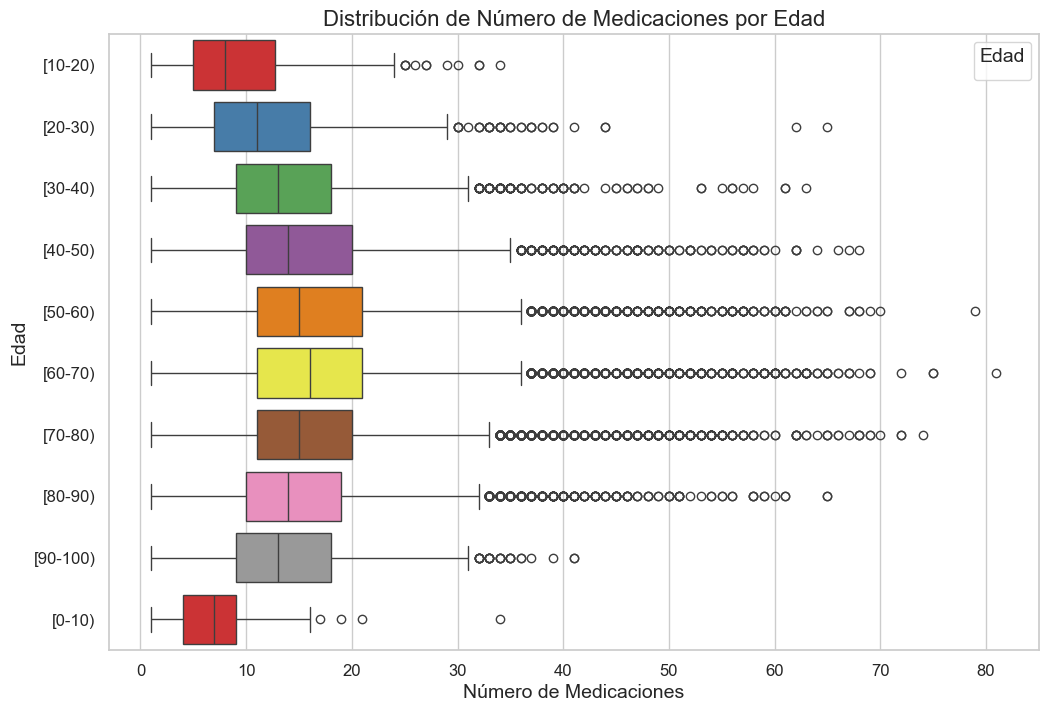

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(12, 8))

# Gráfico de caja (boxplot)
ax = sns.boxplot(
    data=diabetes_df,
    x='num_medications',
    y='age',
    palette='Set1',
    hue='age'
)

# Añade un título
plt.title('Distribución de Número de Medicaciones por Edad', fontsize=16)

# Etiquetas de los ejes
plt.xlabel('Número de Medicaciones', fontsize=14)
plt.ylabel('Edad', fontsize=14)

# Leyenda más grande
plt.legend(title='Edad', title_fontsize='14', loc='upper right')

# Ajusta el formato de las etiquetas en el eje x
plt.xticks(fontsize=12)

# Ajusta el formato de las etiquetas en el eje y
plt.yticks(fontsize=12)

plt.savefig('./documentos/imagenes/distribucion_medicamentos_por_edad.png', dpi=300, bbox_inches='tight')
# Muestra la gráfica
plt.show()

<Figure size 1200x800 with 0 Axes>

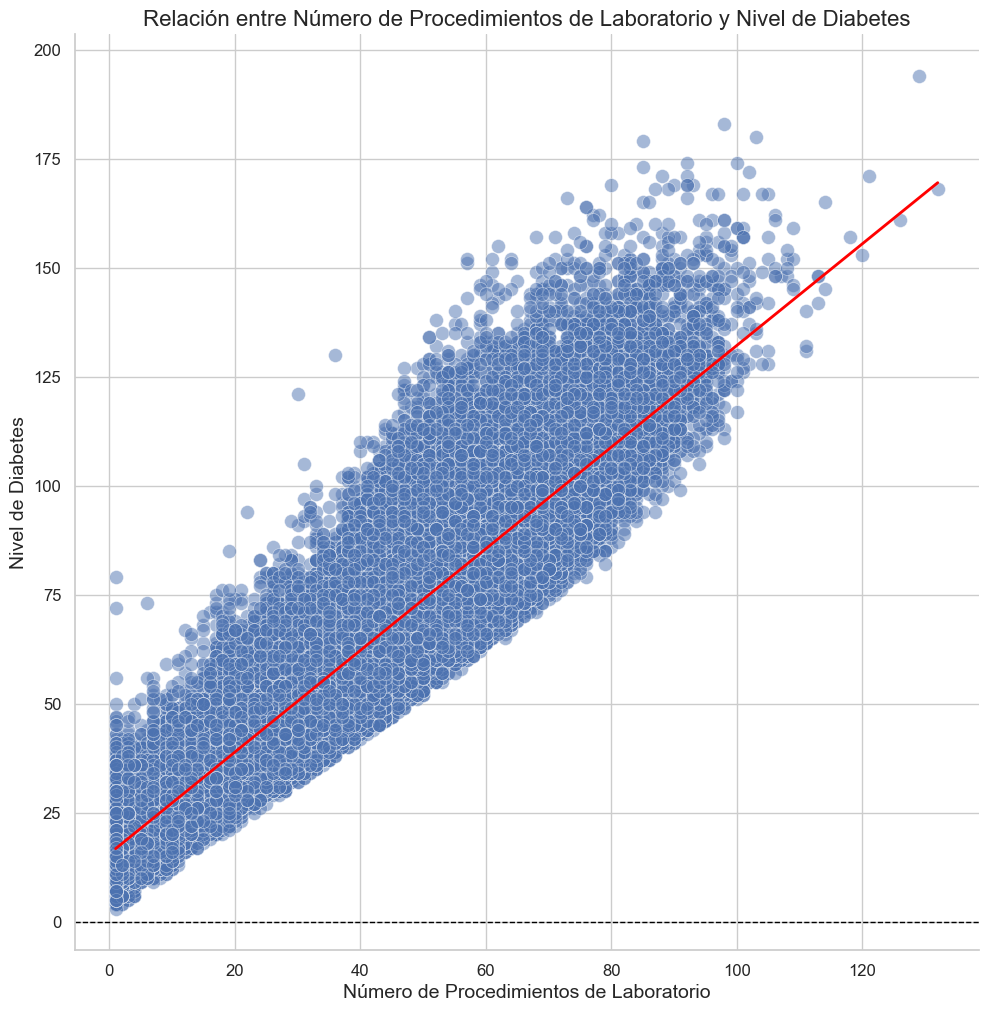

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(12, 8))

# Gráfico de dispersión con línea de regresión
plot = sns.lmplot(
    data=diabetes_df,
    x='num_lab_procedures',
    y='level_diabetes',
    height=10,
    scatter_kws={'alpha': 0.5, 's': 100, 'edgecolors': 'w', 'linewidths': 0.5},
    line_kws={'color': 'red', 'linewidth': 2}
)

# Añade un título
plt.title('Relación entre Número de Procedimientos de Laboratorio y Nivel de Diabetes', fontsize=16)

# Etiquetas de los ejes
plt.xlabel('Número de Procedimientos de Laboratorio', fontsize=14)
plt.ylabel('Nivel de Diabetes', fontsize=14)

# Ajusta el formato de las etiquetas en los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Añade líneas horizontales para mejorar la legibilidad
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.savefig('./documentos/imagenes/relacion_procedimientoslaboratorio_niveldiabetes.png', dpi=300, bbox_inches='tight')
# Muestra la gráfica
plt.show()

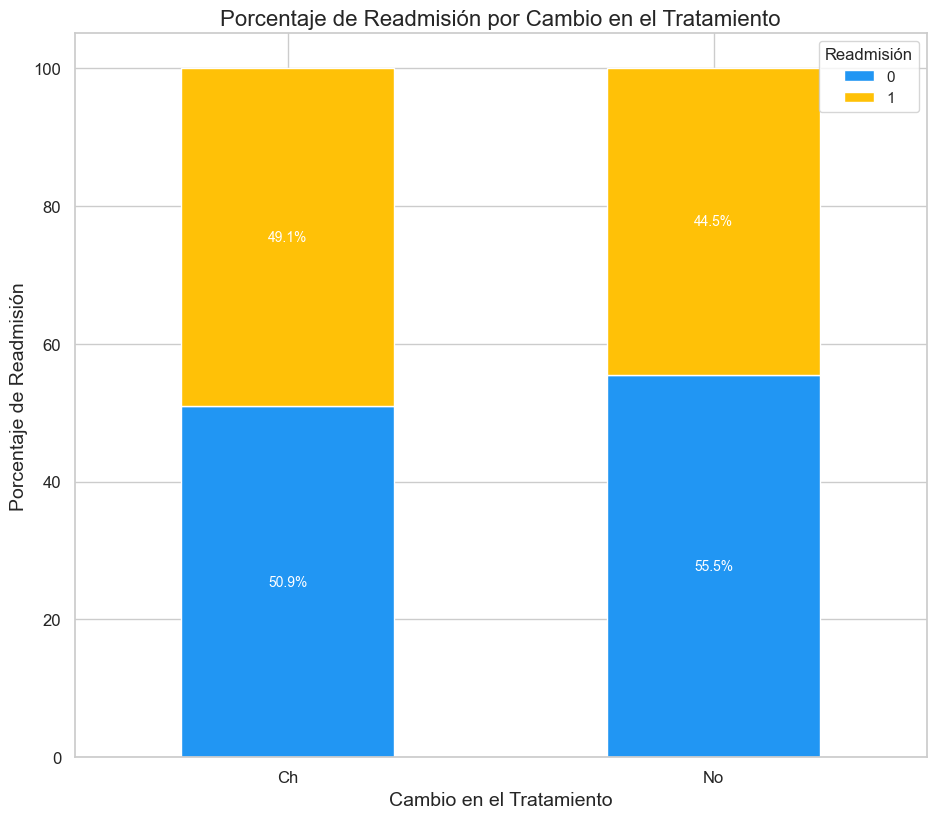

In [ ]:
resumen = pd.crosstab(diabetes_df.change, diabetes_df.numeric_readmitted, normalize='index') * 100

# Gráfico de barras apiladas
ax = resumen.plot(kind='bar', stacked=True, color=['#2196F3', '#FFC107'])

# Añade etiquetas en cada segmento
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='white')

# Añade un título
plt.title('Porcentaje de Readmisión por Cambio en el Tratamiento', fontsize=16)

# Etiquetas de los ejes
plt.xlabel('Cambio en el Tratamiento', fontsize=14)
plt.ylabel('Porcentaje de Readmisión', fontsize=14)

# Leyenda
plt.legend(title='Readmisión', title_fontsize='12', loc='upper right')

# Ajusta el formato de las etiquetas en los ejes
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('./documentos/imagenes/porcentaje_readmision_cambiotratamiento.png', dpi=300, bbox_inches='tight')
# Muestra el gráfico
plt.show()

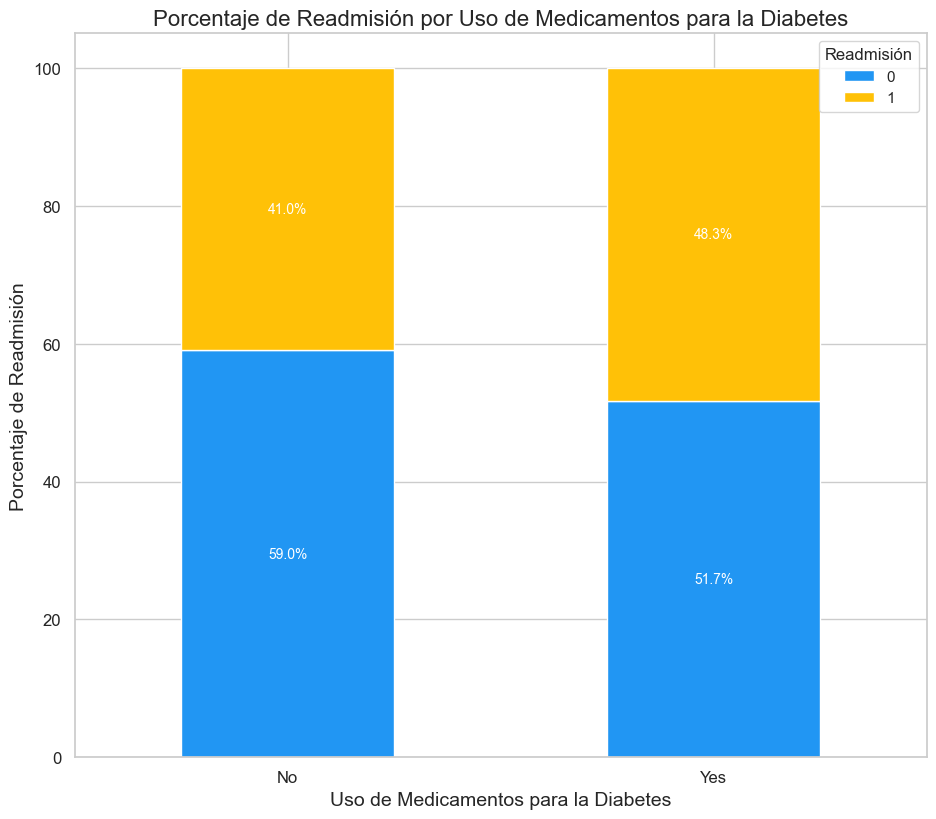

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcula la tabla de frecuencias relativas
resumen = pd.crosstab(diabetes_df.diabetesMed, diabetes_df.numeric_readmitted, normalize='index') * 100

# Gráfico de barras apiladas
ax = resumen.plot(kind='bar', stacked=True, color=['#2196F3', '#FFC107'])

# Añade etiquetas en cada segmento
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='white')

# Añade un título
plt.title('Porcentaje de Readmisión por Uso de Medicamentos para la Diabetes', fontsize=16)

# Etiquetas de los ejes
plt.xlabel('Uso de Medicamentos para la Diabetes', fontsize=14)
plt.ylabel('Porcentaje de Readmisión', fontsize=14)

# Leyenda
plt.legend(title='Readmisión', title_fontsize='12', loc='upper right')

# Ajusta el formato de las etiquetas en los ejes
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('./documentos/imagenes/porcentaje_readmision_medicamentosdiabetes.png', dpi=300, bbox_inches='tight')
# Muestra el gráfico
plt.show()
